# Recovery of the data
Published research articles references responding to 'bacteria' as a search keyword (authors, abstracts, publication journal, ...) were downloaded from Pubmed using dedicated python library (Entrez) to a MongoDB database. Approx. 1.9 million of articles.
An online ressource had impact factors of all existing journals incorporated in classical html tables over different pages. Some parsing using beautifulsoup library allowed the incorporation of the data in the same database.
For more details see the following scripts : 
* Get_ImpactFactors.py
* Get_PubMed.py



# Selection of the data
From the database, articles published between 1985 and 2014, last year of computed impact factor were subselected. From there articles were either considered as a whole or subdivided with respect to their journals impact factor.
When available, all the keywords from the papers were saved into dictionaries and the 500 most abundant were dumped into json format for further use.
Details in the script :
* Data_selection.py

# Data Analysis
## Time evolution of keywords
First let's read in the data:

In [1]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import pygal
import numpy as np
from IPython.display import SVG

ROOT_PATH = os.path.join(os.getcwd(), 'data')
if not os.path.isdir(ROOT_PATH):
    os.mkdir(ROOT_PATH)

# Read in data top keyword counts
data = dict()
data_names = []
for i in range(1985, 2015, 5):
    with open(ROOT_PATH + "/mostcommon_" + str(i) + "_" + str(i + 4) + 
              ".txt", "r") as data_file:
        data[str(i) + "_" + str(i + 4)] = json.load(data_file)
        data_names.append(str(i) + "_" + str(i + 4)) 


Next, data is reformated into pandas dataframe for convenience

In [2]:
df = pd.DataFrame()
for i in data_names:
    if df.empty:
        df = pd.DataFrame(data[i].values(), index=data[i].keys(), columns=[str(i)])
    else:
        df = pd.merge(df, pd.DataFrame(data[i].values(), 
                                      index=data[i].keys(), columns=[str(i)]), 
                      left_index=True, right_index=True, how='outer').fillna(0)


Ratios in normalized keywords counts from one time period to the following were computed to get a score that indicate evolution over time.

In [3]:
for i in range(0, len(data_names) - 1):
    ratio = df[data_names[i + 1]] / df[data_names[i]]
    df[str(data_names[i + 1] + '/' + data_names[i])] = ratio 

sc_df = df.fillna(1).replace('%','',regex=True).astype('float')

Start generating graphs following different 'major' chosen profiles. Global overview of all data points was useless.

In [4]:
# Change default font
custom_style = pygal.style.Style(
    background='white',
    plot_background='white',
    font_family='Lato')


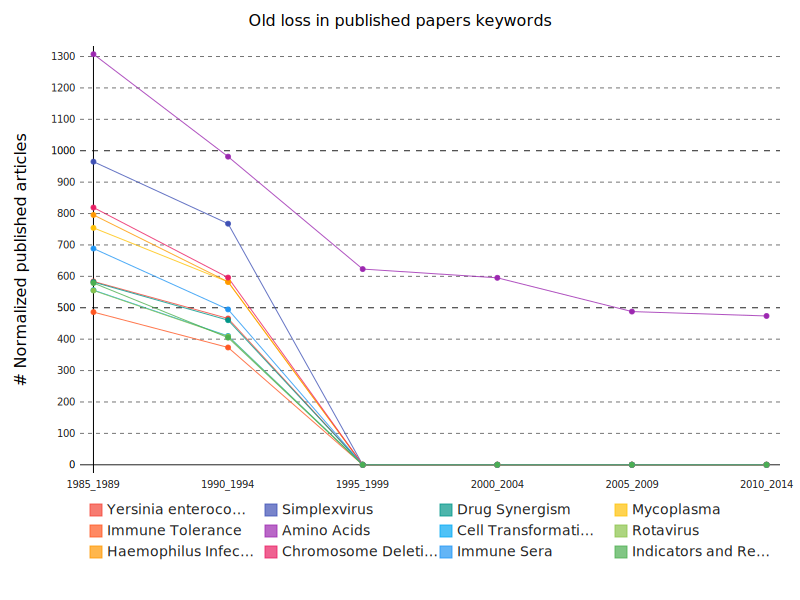

In [5]:
# First lost, not coming back
sort_data = sc_df.sort_values(by="1990_1994/1985_1989",ascending=False)
data = sort_data.loc[(sc_df["1990_1994/1985_1989"] <= 0.8) &
                     (sc_df["1995_1999/1990_1994"] <= 0.8) &
                     (sc_df["2000_2004/1995_1999"] <= 1.2) & 
                     (sc_df["2000_2004/1995_1999"] >= 0.8) & 
                     (sc_df["2005_2009/2000_2004"] <= 1.2) & 
                     (sc_df["2005_2009/2000_2004"] >= 0.8) & 
                     (sc_df["2010_2014/2005_2009"] <= 1.2) &
                     (sc_df["2010_2014/2005_2009"] >= 0.8), data_names][:12]

line_chart = pygal.Line(logarithmic=False, legend_at_bottom=True, 
                        style=custom_style, y_title='# Normalized published articles')
line_chart.title = 'Old loss in published papers keywords'
line_chart.x_labels = list(data.keys())
for row in data.iterrows():
    line_chart.add(str(row[0]), list(row[1]))
line_chart.render_to_file(ROOT_PATH + '/old_loss.svg')
SVG(filename=ROOT_PATH + '/old_loss.svg')

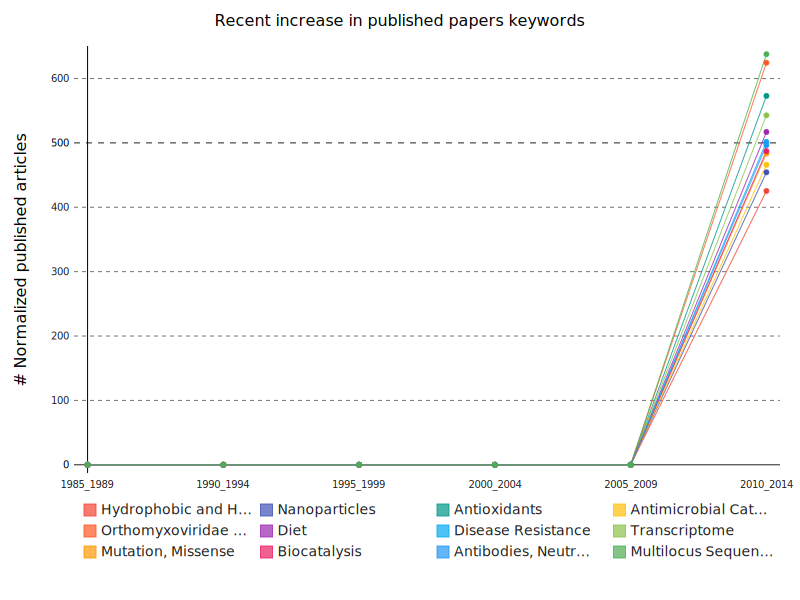

In [6]:
sort_data = sc_df.sort_values(by="2010_2014/2005_2009",ascending=False)
data = sort_data.loc[(sc_df["1990_1994/1985_1989"] >= 0.8) &
                     (sc_df["1990_1994/1985_1989"] <= 1.2) &
                     (sc_df["1995_1999/1990_1994"] >= 0.8) &
                     (sc_df["1995_1999/1990_1994"] <= 1.2) &
                     (sc_df["2000_2004/1995_1999"] <= 1.2) &
                     (sc_df["2000_2004/1995_1999"] >= 0.8) &
                     (sc_df["2005_2009/2000_2004"] <= 1.2) & 
                     (sc_df["2005_2009/2000_2004"] >= 0.8) & 
                     (sc_df["2010_2014/2005_2009"] >= 1.4), data_names][:12]


line_chart = pygal.Line(logarithmic=False, legend_at_bottom=True, 
                        style=custom_style, y_title='# Normalized published articles')
line_chart.title = 'Recent increase in published papers keywords'
line_chart.x_labels = list(data.keys())
for row in data.iterrows():
    line_chart.add(str(row[0]), list(row[1]))
line_chart.render_to_file(ROOT_PATH + '/recent_increase.svg')
SVG(filename=ROOT_PATH + '/recent_increase.svg')


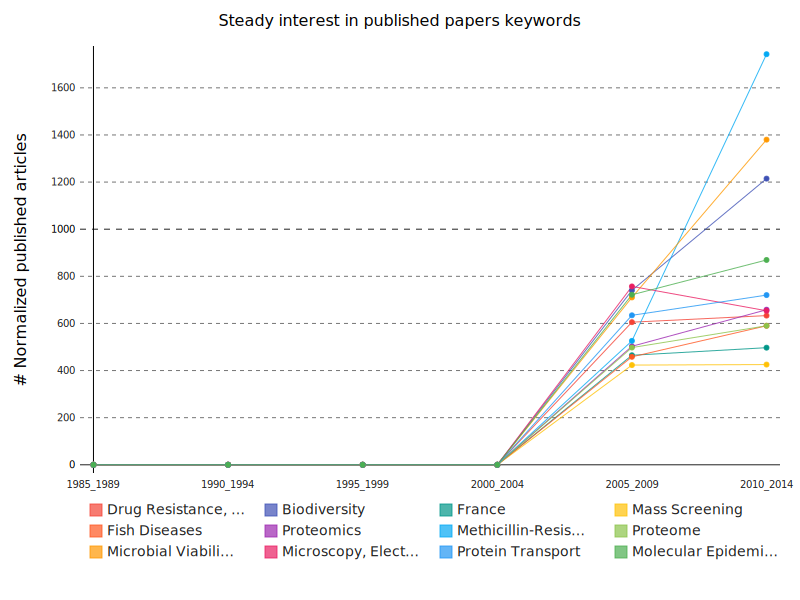

In [7]:
sort_data = sc_df.sort_values(by="2005_2009/2000_2004",ascending=False)
data = sort_data.loc[(sc_df["1990_1994/1985_1989"] >= 0.8) &
                     (sc_df["1990_1994/1985_1989"] <= 1.2) &
                     (sc_df["1995_1999/1990_1994"] >= 0.8) &
                     (sc_df["1995_1999/1990_1994"] <= 1.2) &
                     (sc_df["2000_2004/1995_1999"] <= 1.2) &
                     (sc_df["2000_2004/1995_1999"] >= 0.8) &
                     (sc_df["2005_2009/2000_2004"] >= 1.2) &  
                     (sc_df["2010_2014/2005_2009"] >= 0.8), data_names][:12]


line_chart = pygal.Line(logarithmic=False, legend_at_bottom=True, 
                        style=custom_style, y_title='# Normalized published articles')
line_chart.title = 'Steady interest in published papers keywords'
line_chart.x_labels = list(data.keys())
for row in data.iterrows():
    line_chart.add(str(row[0]), list(row[1]))
line_chart.render_to_file(ROOT_PATH + '/steady_interest.svg')
SVG(filename=ROOT_PATH + '/steady_interest.svg')

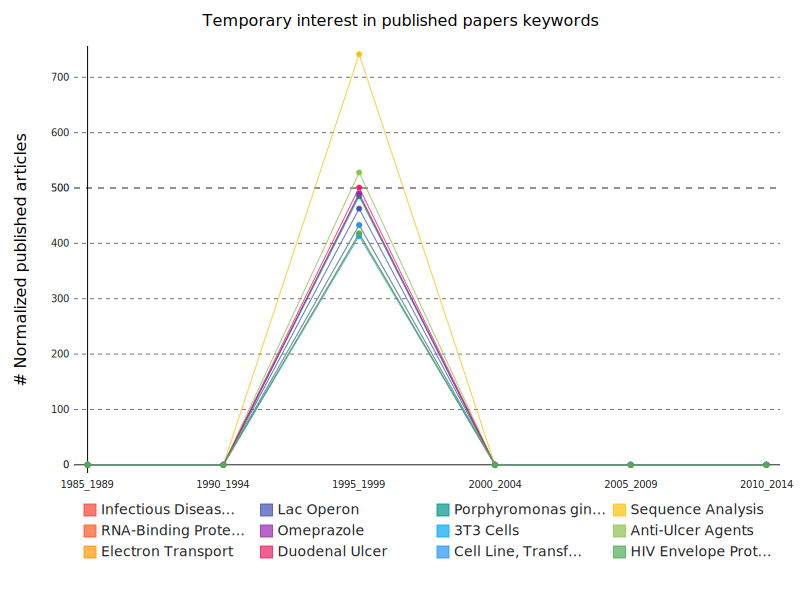

In [8]:
data = sc_df.sort_values(by="1995_1999/1990_1994",ascending=False)
data = sort_data.loc[(sc_df["1990_1994/1985_1989"] >= 0.8) &
                     (sc_df["1990_1994/1985_1989"] <= 1.2) &
                     (sc_df["1995_1999/1990_1994"] >= 1.2) &
                     (sc_df["2000_2004/1995_1999"] <= 0.8) &
                     (sc_df["2005_2009/2000_2004"] <= 1.2) &
                     (sc_df["2005_2009/2000_2004"] >= 0.8) &
                     (sc_df["2010_2014/2005_2009"] >= 0.8) &
                     (sc_df["2010_2014/2005_2009"] <= 1.2), data_names][:12]


line_chart = pygal.Line(logarithmic=False, legend_at_bottom=True, 
                        style=custom_style, y_title='# Normalized published articles')
line_chart.title = 'Temporary interest in published papers keywords'
line_chart.x_labels = list(data.keys())
for row in data.iterrows():
    line_chart.add(str(row[0]), list(row[1]))
line_chart.render_to_file(ROOT_PATH + '/moment_glory.svg')
SVG(filename=ROOT_PATH + '/moment_glory.svg')

What happens, if you look for a few keywords in relation with your PhD ?

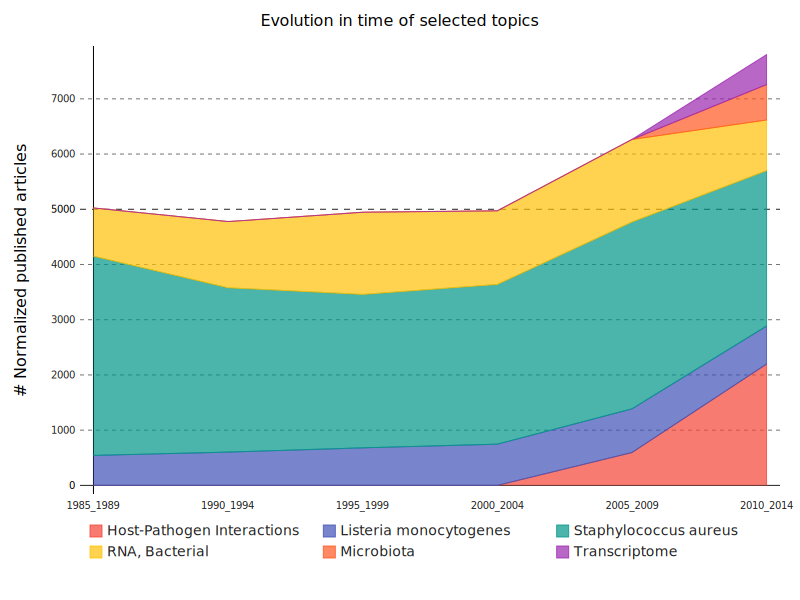

In [9]:
#Focused targets
data = sc_df[[0, 1, 2, 3, 4, 5]].ix[['Host-Pathogen Interactions', 
                                     'Listeria monocytogenes', 
                                     'Staphylococcus aureus', 
                                     'RNA, Bacterial', 
                                     'Microbiota', 
                                     'Transcriptome']]
line_chart = pygal.StackedLine(fill=True, legend_at_bottom=True, 
                               style=custom_style, y_title='# Normalized published articles', 
                               truncate_legend=-1)
line_chart.title = 'Evolution in time of selected topics'
line_chart.x_labels = list(data.keys())
for row in data.iterrows():
    line_chart.add(str(row[0]), list(row[1]), show_dots=False)
line_chart.render_to_file(ROOT_PATH + '/Topics_Line_2010_2014.svg')
SVG(filename=ROOT_PATH + '/Topics_Line_2010_2014.svg')

## Keywords broken down with respect to Impact Factors
Reading the data

In [10]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import pygal
import numpy as np

ROOT_PATH = os.path.join(os.getcwd(), 'data')
if not os.path.isdir(ROOT_PATH):
    os.mkdir(ROOT_PATH)


# Read in data top keyword counts
data = dict()
data_names = []
for i in range(1985, 2015, 5):
    for low, high in [(0, 5), (5, 15), (15, 100)]:
        with open(ROOT_PATH + "/mostcommon_" + str(i) + "_" + str(i + 4) + '_IF_' + 
                  str(low) + '_' + str(high) + ".txt", "r") as data_file:
            data[str(i) + "_" + str(i + 4) + '_IF_' + str(low) + '_' + str(high)] = json.load(data_file)
            data_names.append(str(i) + "_" + str(i + 4) + '_IF_' + str(low) + '_' + str(high)) 

# Merge dicts into dataframe
df = pd.DataFrame()
for i in data_names:
    if df.empty:
        df = pd.DataFrame(data[i].values(), index=data[i].keys(), columns=[str(i)])
    else:
        df = pd.merge(df, pd.DataFrame(data[i].values(), index=data[i].keys(), columns=[str(i)]), 
                      left_index=True, right_index=True, how='outer').fillna(0)

sc_df = df.replace('%','',regex=True).astype('float')


How does most recent data look like ?

In [11]:
data = sc_df[[15, 16, 17]]
line_chart = pygal.Line(show_legend=False, legend_at_bottom=True, 
                        style=custom_style, y_title='# Normalized published articles')
line_chart.title = 'Influence of IF on 2010-2014'
line_chart.x_labels = list(x.lstrip('2010_2014_') for x in data.keys())
for row in data.iterrows():
    line_chart.add(str(row[0]), list(row[1]))
line_chart.render_to_file(ROOT_PATH + '/IF_2010_2014.svg')
SVG(filename=ROOT_PATH + '/IF_2010_2014.svg')

And the period before ?

In [12]:
data = sc_df[[12, 13, 14]]
line_chart = pygal.Line(show_legend=False, legend_at_bottom=True, 
                        style=custom_style, y_title='# Normalized published articles')
line_chart.title = 'Influence of IF on 2005-2009'
line_chart.x_labels = list(x.lstrip('2005_2009_') for x in data.keys())
for row in data.iterrows():
    line_chart.add(str(row[0]), list(row[1]))
line_chart.render_to_file(ROOT_PATH + '/IF_2005_2009.svg')
SVG(filename=ROOT_PATH + '/IF_2005_2009.svg')

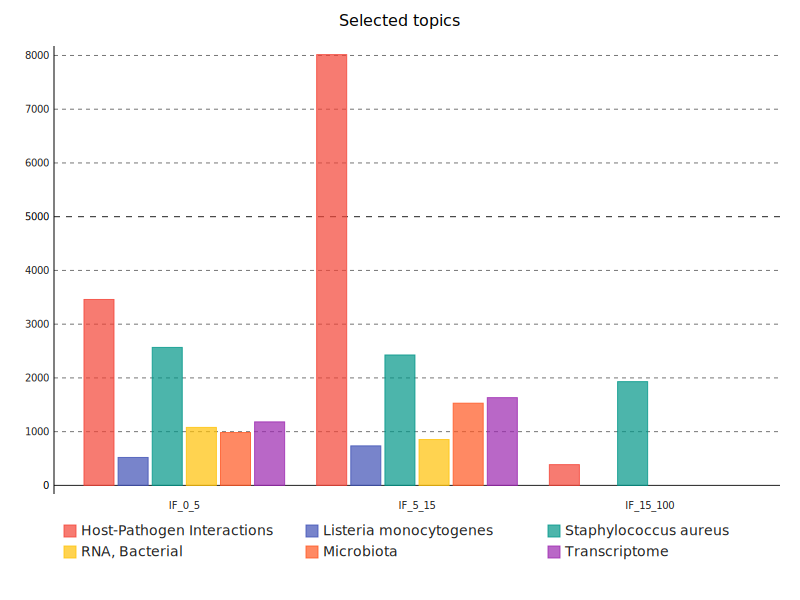

In [13]:
data = sc_df[[15, 16, 17]].ix[['Host-Pathogen Interactions', 
                               'Listeria monocytogenes', 
                               'Staphylococcus aureus', 
                               'RNA, Bacterial', 
                               'Microbiota', 
                               'Transcriptome']]
bar_chart = pygal.Bar(truncate_legend=-1, legend_at_bottom=True, style=custom_style)
bar_chart.title = 'Selected topics'
bar_chart.x_labels = list(x.lstrip('2010_2014') for x in data.keys())
for row in data.iterrows():
    bar_chart.add(str(row[0]), list(row[1]))
bar_chart.render_to_file(ROOT_PATH + '/Topics_Bar_IF_2010_2014.svg')
SVG(filename=ROOT_PATH + '/Topics_Bar_IF_2010_2014.svg')

# Conclusion
The data indicates that keywords represent a good indicator to follow research topics of interest (discussed).
A great majority of topics are shared within the two lowest IF categories, the highest ones seem to only retain certain limited keywords.
One can use IF combined with published journals keywords to target journals based on selected keywords  with an ongoing study.